<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Test-data" data-toc-modified-id="Test-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Test data</a></span></li><li><span><a href="#Scatter-pie-plot-basic-function" data-toc-modified-id="Scatter-pie-plot-basic-function-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Scatter pie plot basic function</a></span><ul class="toc-item"><li><span><a href="#Colors" data-toc-modified-id="Colors-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Colors</a></span></li><li><span><a href="#plt.scatter-kwargs" data-toc-modified-id="plt.scatter-kwargs-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>plt.scatter kwargs</a></span></li><li><span><a href="#marker-resolution" data-toc-modified-id="marker-resolution-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>marker resolution</a></span></li><li><span><a href="#plotting-direction" data-toc-modified-id="plotting-direction-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>plotting direction</a></span></li></ul></li><li><span><a href="#Scatter-pie-plot-from-dataframe" data-toc-modified-id="Scatter-pie-plot-from-dataframe-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Scatter pie plot from dataframe</a></span></li></ul></div>

In [1]:
import sys
# sys.path.append('~/git/scatterpie/scatterpie/')
sys.path.append('/Users/racng/git/scatterpie')
import scatterpie.plot as plot

In [2]:
from typing import Union, Optional, Sequence, Any, Mapping, List, Tuple, Callable
import operator
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Test data

In [3]:
x = [1,2,3,3]
y = [1,2,2,1]
apple = [3,0,1,1]
orange = [1,1,0,1]
df = pd.DataFrame({'x':x, 'y':y, 'apple':apple, 'orange':orange})
df

,x,y,apple,orange
0,1,1,3,1
1,2,2,0,1
2,3,2,1,0
3,3,1,1,1


In [4]:
df_norm = df.copy().set_index(['x', 'y'])
categories = df_norm.columns
df_norm = df_norm.div(df_norm.sum(axis=1), axis=0).fillna(0)
df_norm = df_norm.reset_index()
df_norm

,x,y,apple,orange
0,1,1,0.75,0.25
1,2,2,0.00,1.00
2,3,2,1.00,0.00
3,3,1,0.50,0.50


In [5]:
ratios =  df_norm[categories].to_records(index=False).tolist()
ratios

[(0.75, 0.25), (0.0, 1.0), (1.0, 0.0), (0.5, 0.5)]

# Scatter pie plot basic function

In [6]:
df_norm

,x,y,apple,orange
0,1,1,0.75,0.25
1,2,2,0.00,1.00
2,3,2,1.00,0.00
3,3,1,0.50,0.50


In [7]:
ratios = df_norm[['apple', 'orange']].to_records(index=False).tolist()

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

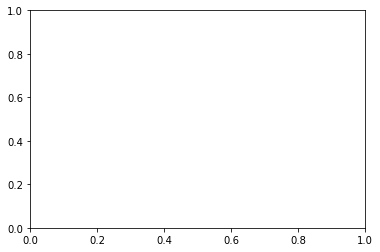

In [8]:
# defautl settings
plot.scatter_pie(x, y, ratios)

## Colors

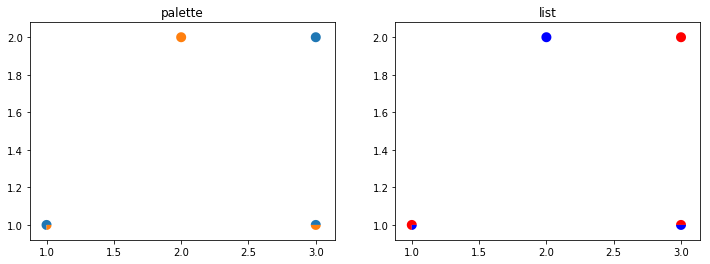

In [9]:
# list of colors or color palette
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,4))
ax1.set_title("palette")
ax2.set_title("list")
plot.scatter_pie(x, y, ratios, "tab10",  ax=ax1)
plot.scatter_pie(x, y, ratios, ["r", "b"], ax=ax2)

## plt.scatter kwargs

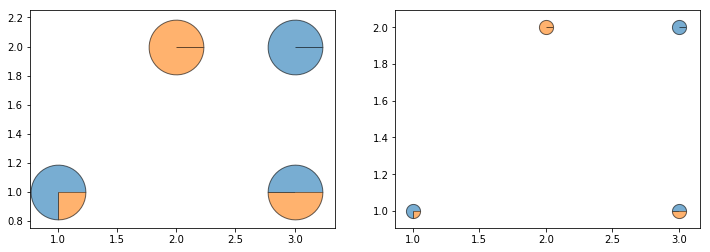

In [10]:
# handling of kwargs
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,4))
plot.scatter_pie(x, y, ratios, size=3000, edgecolor='black', alpha=0.6, ax=ax1)
ax, df_norm = plot.scatter_pie_from_df(df, 'x', 'y', return_df=True, size=200, edgecolor='black', alpha=0.6, ax=ax2)

## marker resolution

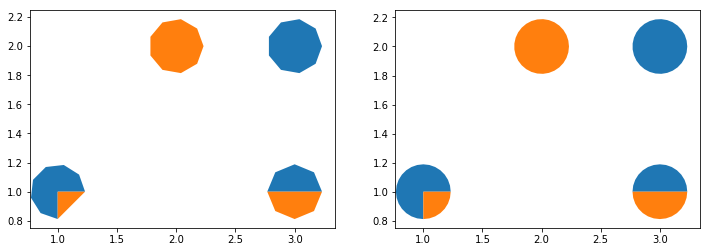

In [11]:
# res argument
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,4))
plot.scatter_pie(x, y, ratios, res=10, size=3000, ax=ax1)
plot.scatter_pie(x, y, ratios, res=30, size=3000, ax=ax2)

## plotting direction

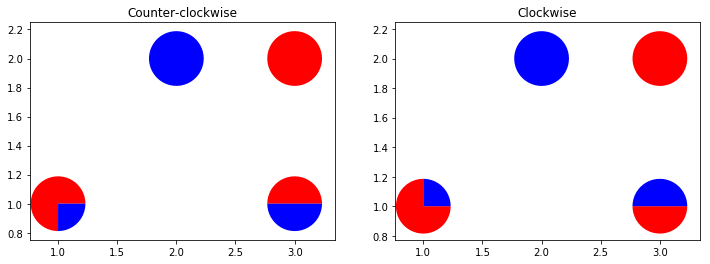

In [12]:
#direction
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,4))
ax1.set_title("Counter-clockwise")
ax2.set_title("Clockwise")
plot.scatter_pie(x, y, ratios, ["r", "b"], direction='+', size=3000, ax=ax1)
plot.scatter_pie(x, y, ratios, ["r", "b"], direction='-', size=3000, ax=ax2)

# Scatter pie plot from dataframe

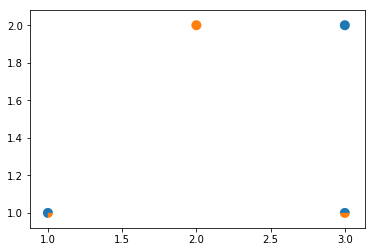

In [13]:
# handling of kwargs
ax = plot.scatter_pie_from_df(df, 'x', 'y')

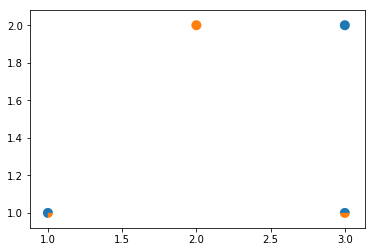

In [14]:
ax, df_norm = plot.scatter_pie_from_df(df, 'x', 'y', return_df=True)